In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_patient = pd.read_csv("data/patient_data.csv")

In [4]:
symptoms = [x for x in df_patient.columns if 'symp' in x]
diagnoses = [x for x in df_patient.columns if 'dx' in x]

## Plotting symptom frequencies for positive/ negative diseases

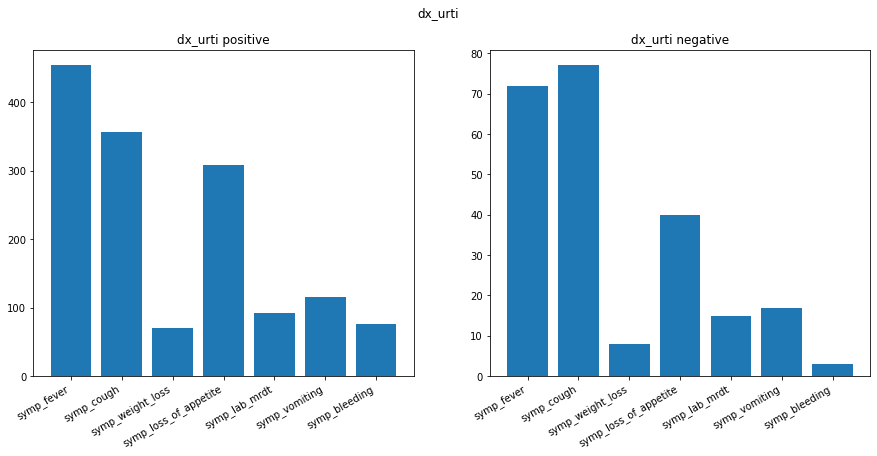

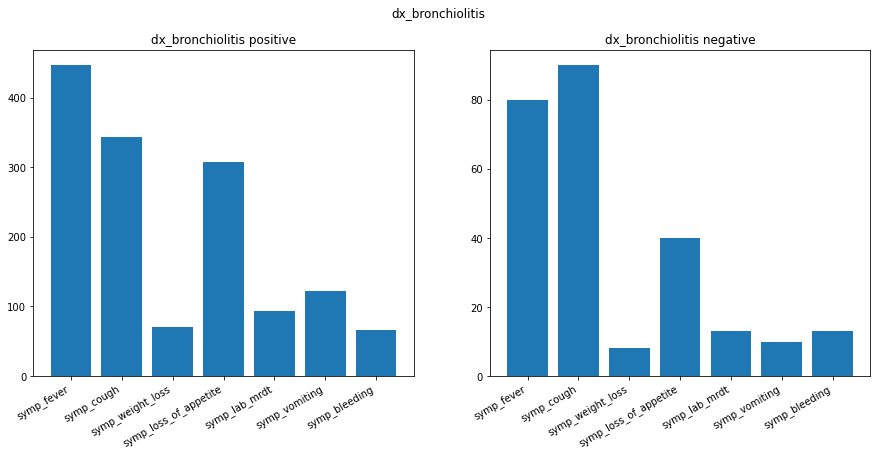

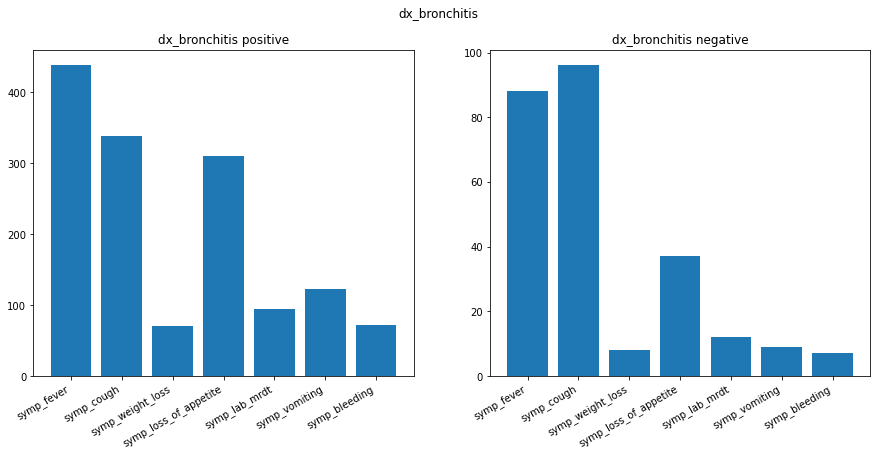

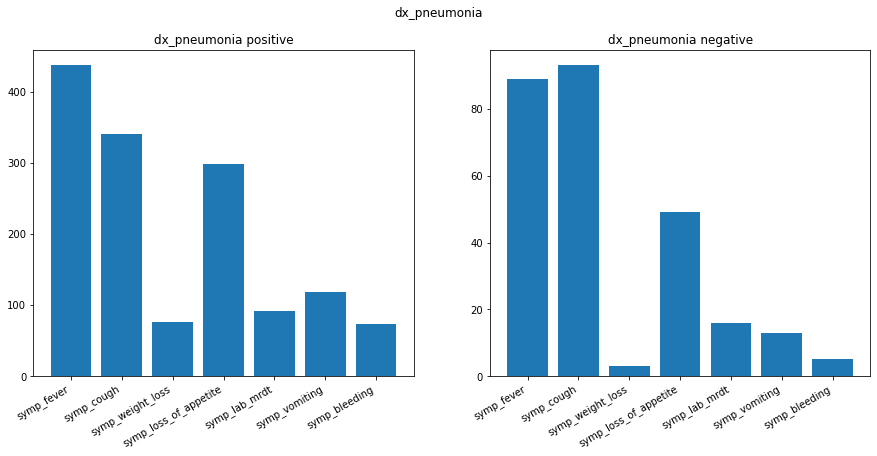

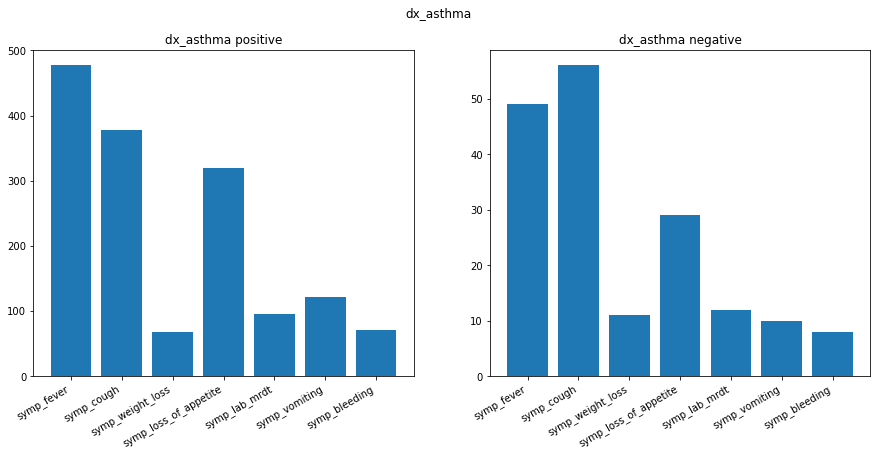

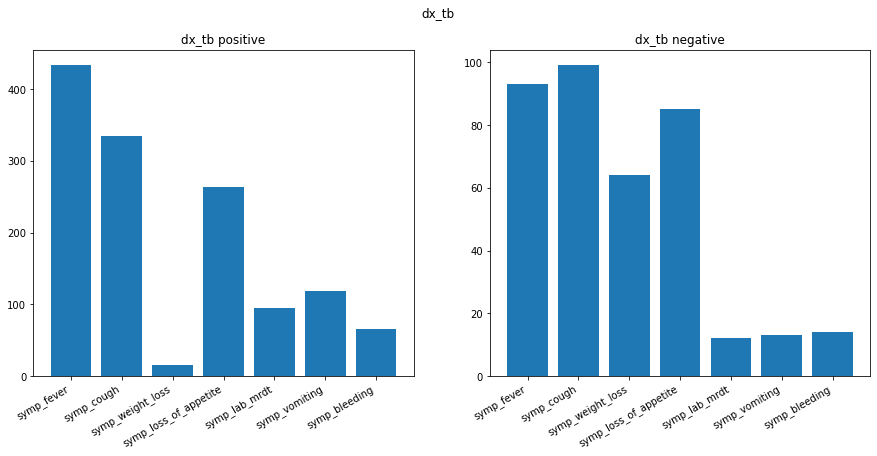

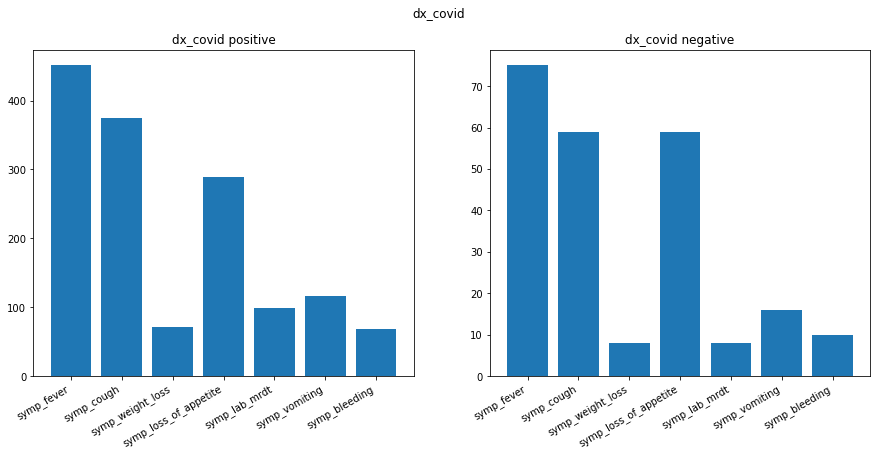

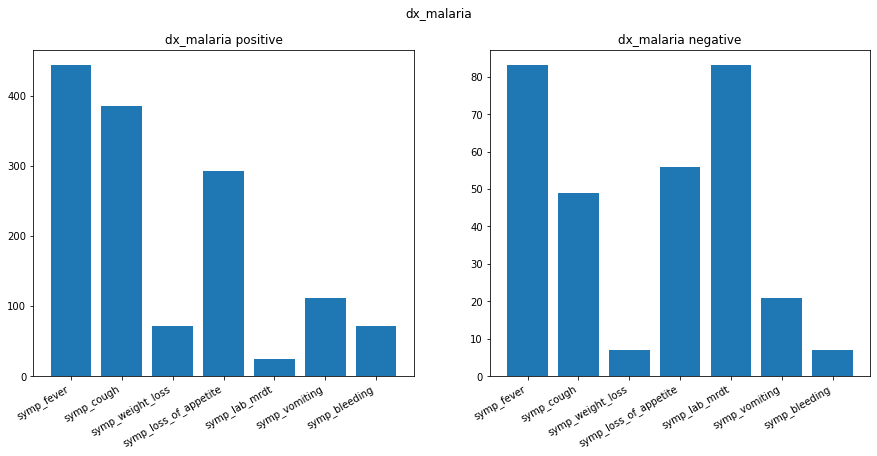

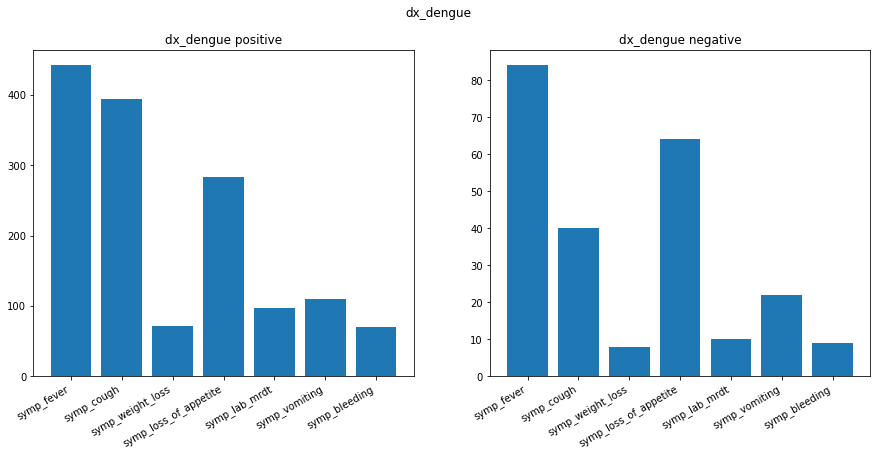

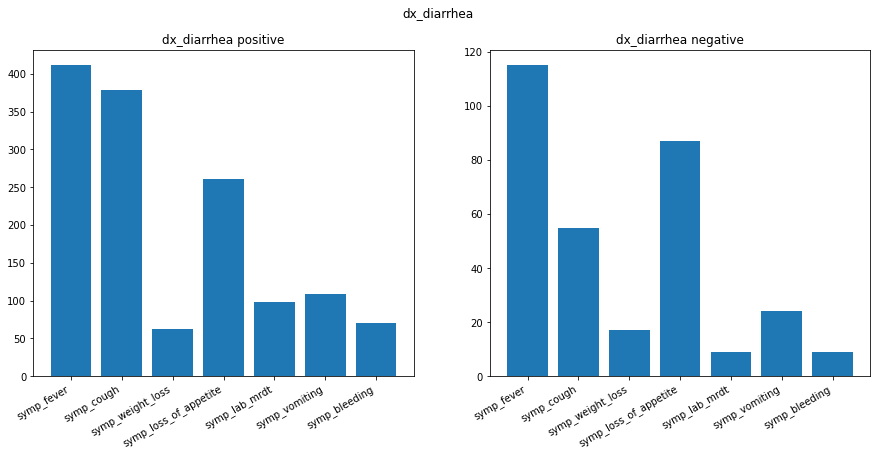

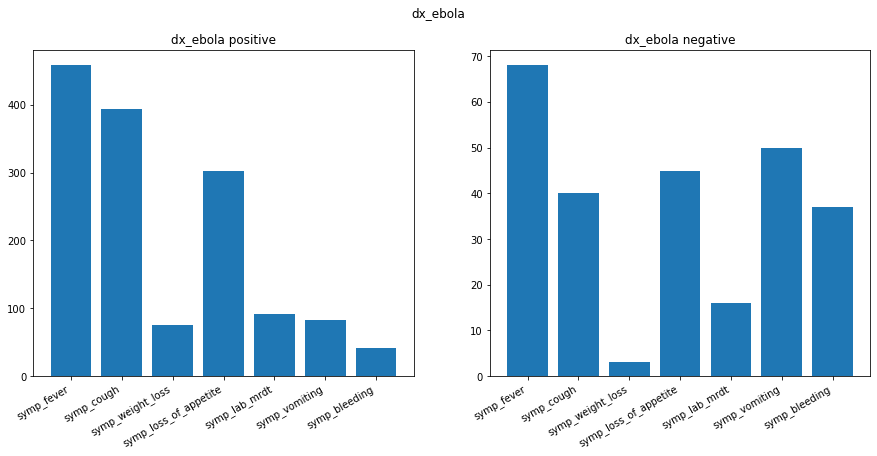

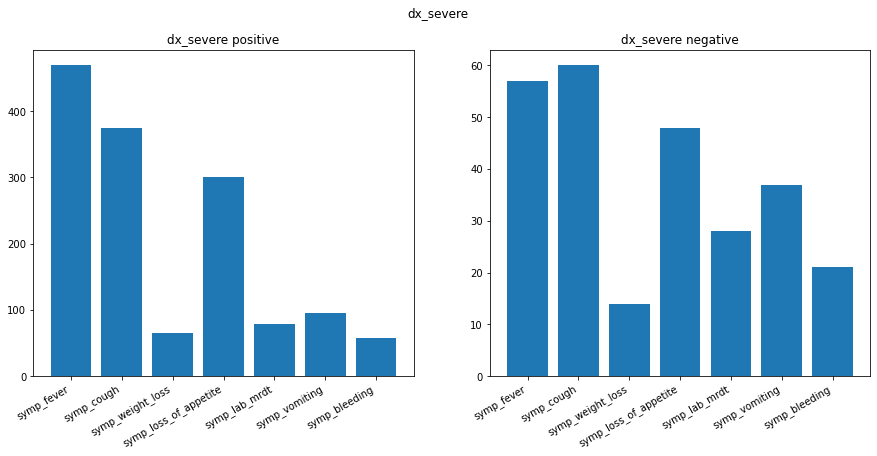

In [6]:
for diagnosis in diagnoses:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    # plt.title("hello")
    titles = ["positive", "negative"]
    for i, df in enumerate(df_patient.groupby(f"{diagnosis}")):
        a = df[1].drop(columns=diagnoses).sum()
        axs[i].bar([x for x in range(len(a))], a, tick_label=symptoms)
        plt.setp(axs[i].get_xticklabels(), rotation=30, horizontalalignment='right')
        axs[i].set_title(f"{diagnosis} {titles[i]}")
    #     plt.xticks(range(len(a)), symptoms)
    #     axs[i].xticks(range(len(a)), symptoms)
    #     axs[i].set_xticks([x for x in range(len(a))])
    #     axs[i].set_xlabels(symptoms)
    #     plt.hist(_df[1].sum())
    #     print(_df)

    plt.suptitle(f"{diagnosis}")
    plt.savefig(f"figures/{diagnosis}_hist.png", bbox_inches="tight")

## Model V2

In [1]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("data/patient_data.csv")
df.head()

,country,disease_urti,disease_bronchiolitis,disease_bronchitis,disease_pneumonia,disease_asthma,disease_tb,disease_covid,disease_malaria,disease_dengue,...,disease_severe,age,season,symptom_fever,symptom_cough,symptom_loss_of_appetite,symptom_vomiting,symptom_weight_loss,symptom_bleeding,symptom_lab_mrdt
0,South Korea,False,False,False,False,False,False,False,False,False,...,False,child,spring,False,False,False,False,False,False,False
1,Switzerland,True,False,False,False,False,True,False,False,False,...,False,young,winter,True,True,True,False,False,False,True
2,Brazil,False,False,False,False,False,False,False,False,False,...,False,elderly,spring,False,False,False,False,False,False,False
3,Switzerland,False,True,False,False,False,False,False,False,False,...,False,middle-aged,winter,True,True,False,False,False,False,False
4,Brazil,False,False,False,False,False,False,False,False,False,...,False,elderly,summer,False,False,False,False,True,False,False


<AxesSubplot:xlabel='season', ylabel='symptom_cough'>

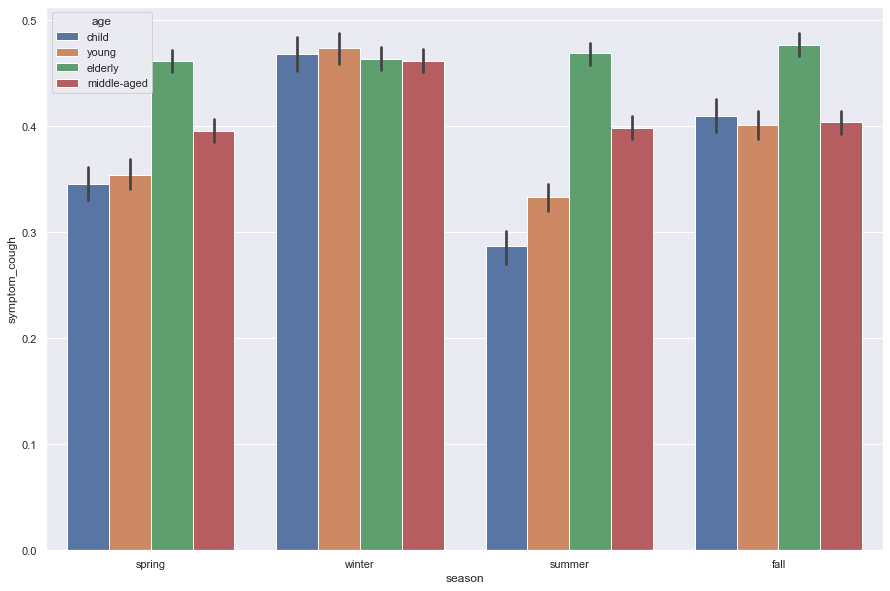

In [50]:
sns.set(rc={'figure.figsize': (15, 10)})
sns.color_palette('pastel')

symptoms = [x for x in df.columns if 'symp' in x]
diagnoses = [x for x in df.columns if 'disease' in x]

# for season in df['season'].unique():
#     fig, axs = plt.subplots(1, 2, figsize=(15, 6))
#     for i, df_season in enumerate(df.groupby(f"{season}")):
# sns.histplot(data=df, x='disease_urti', hue='country', multiple='stack')

sns.barplot(x='season', y='symptom_cough', hue='age', data=df, palette='deep')

In [12]:
df[df['season'] == 'spring']['symptom_cough'].mean()

0.40272982737856283